In [7]:
import pandas as pd
import numpy as np

In [8]:
pd.set_option("display.max_columns", None)
pd.set_option("display.width", 120)

In [9]:
df = pd.read_csv("train.csv")

In [10]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
df["Gender"] = df["Sex"].map({"male": 0, "female": 1})
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [12]:
df.shape

(891, 13)

# Part A -- Basic

In [13]:
print("Shape:", df.shape)
print("\\nInfo:")
df.info()
display(df.head(5))

Shape: (891, 13)
\nInfo:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Gender       891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


## summary of data

In [14]:
summary = pd.DataFrame({
    "column": df.columns,
    "dtype": [df[col].dtype for col in df.columns],
    "missing": [df[col].isna().sum() for col in df.columns],
    "unique": [df[col].nunique() for col in df.columns],
    # "min": [df[col].min() for col in df.columns],
    # "max": [df[col].max() for col in df.columns],
}).sort_values("missing", ascending=False).reset_index(drop=True)

In [15]:
summary

,column,dtype,missing,unique
0,Cabin,object,687,147
1,Age,float64,177,88
2,Embarked,object,2,3
3,Survived,int64,0,2
4,PassengerId,int64,0,891
5,Sex,object,0,2
6,Name,object,0,891
7,Pclass,int64,0,3
8,SibSp,int64,0,7
9,Ticket,object,0,681


In [16]:
def counts_and_perc(series: pd.Series) -> pd.DataFrame:
    counts = series.value_counts(dropna=False)
    perc = series.value_counts(normalize=True, dropna=False) * 100
    out = pd.DataFrame({"count": counts, "percent": perc.round(2)})
    return out

for col in ["Pclass", "Gender", "Embarked"]:
    if col in df.columns:
        print(f"\\n== {col} ==")
        display(counts_and_perc(df[col]))
    else:
        print(f"Column '{col}' not found.")

\n== Pclass ==


,count,percent
Pclass,,
3,491,55.11
1,216,24.24
2,184,20.65


\n== Gender ==


,count,percent
Gender,,
0,577,64.76
1,314,35.24


\n== Embarked ==


,count,percent
Embarked,,
S,644,72.28
C,168,18.86
Q,77,8.64
NaN,2,0.22


In [17]:
# Create a DataFrame female_firstclass_over_30 with females in 1st class and Age>30
# Show the top 10 rows sorted by Fare desc.
mask = (df["Gender"] == "female") & (df["Pclass"] == 1) & (df["Age"] > 30)
female_firstclass_over_30 = df.loc[mask].sort_values("Fare", ascending=False)
display(female_firstclass_over_30.head(10))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender


In [18]:
# Age mean/median/mode (ignore missing)
age_mean = df["Age"].mean()
age_median = df["Age"].median()
age_mode = df["Age"].mode().iloc[0] if not df["Age"].mode().empty else np.nan
fare_by_pclass = df.groupby("Pclass", as_index=False)["Fare"].mean()
survival_overall = df["Survived"].mean()
survival_by_gender = df.groupby("Gender")["Survived"].mean().sort_values(ascending=False)

print(f"Age mean: {age_mean:.2f}, median: {age_median:.2f}, mode: {age_mode}")
print(f"Overall survival rate: {survival_overall:.3f}")
print("\nMean Fare per Pclass:")
display(fare_by_pclass)
print("\nSurvival rate by Gender:")
display(survival_by_gender)

Age mean: 29.70, median: 28.00, mode: 24.0
Overall survival rate: 0.384

Mean Fare per Pclass:


,Pclass,Fare
0,1,84.154687
1,2,20.662183
2,3,13.675550



Survival rate by Gender:


Gender
1    0.742038
0    0.188908
Name: Survived, dtype: float64

In [19]:
# B1) Missing value imputation (Age → median by Pclass & Gender)
# Create Age_imputed by filling Age with the group median of (Pclass, Gender)
df["Age_Imputed"] = df["Age"]
before_missing = df["Age_Imputed"].isna().sum()

age_medians = df.groupby(["Pclass", "Gender"])["Age"].median()
def fill_age(row):
    if pd.isna(row["Age_Imputed"]):
        return age_medians.loc[(row["Pclass"], row["Gender"])]
    return row["Age_Imputed"]

df["Age_Imputed"] = df.apply(fill_age, axis=1)

after_missing = df["Age_Imputed"].isna().sum()
print(f"Missing Age before: {before_missing}, after: {after_missing}")

Missing Age before: 177, after: 0


In [20]:
# Extract title like 'Mr', 'Mrs', 'Miss', 'Master', etc.
df["Title"] = df["Name"].str.extract(r" ([A-Za-z]+)\\.", expand=False)
title_counts = df["Title"].value_counts()
display(title_counts)

Series([], Name: count, dtype: int64)

In [22]:
# family size and new feature
df["FamilySize"] = df["SibSp"] + df["Parch"] + 1
df["IsAlone"] = df["FamilySize"] == 1

survival_by_isalone = df.groupby("IsAlone")["Survived"].mean().rename("SurvivalRate")
display(survival_by_isalone)

IsAlone
False    0.505650
True     0.303538
Name: SurvivalRate, dtype: float64

In [24]:
# Survival rate indexed by Pclass (rows) and Gender (columns)
pivot_survival = pd.pivot_table(df, values="Survived", index="Pclass", columns="Gender", aggfunc="mean")
display(pivot_survival)

# Average Fare and Age_imputed for (Pclass, Embarked)
grouped_stats = df.groupby(["Pclass", "Embarked"], as_index=False).agg(
    avg_fare=("Fare", "mean"),
    avg_age=("Age_Imputed", "mean")
)
display(grouped_stats)

Gender,0,1
Pclass,,
1,0.368852,0.968085
2,0.157407,0.921053
3,0.135447,0.500000


,Pclass,Embarked,avg_fare,avg_age
0,1,C,104.718529,37.988235
1,1,Q,90.000000,38.500000
2,1,S,70.364862,38.271024
3,2,C,25.358335,23.617647
4,2,Q,12.350000,38.333333
5,2,S,20.327439,30.355671
6,3,C,11.214083,21.983636
7,3,Q,11.183393,24.194444
8,3,S,14.644083,25.453258


In [25]:
# Replace missing cabins with 'Unknown', then extract deck letter.
df["Cabin"] = df["Cabin"].fillna("Unknown")

# Take the first cabin token when multiple are listed, then the first character.
first_cabin = df["Cabin"].astype(str).str.split().str[0]
df["CabinDeck"] = first_cabin.str[0].str.upper()
df.loc[df["Cabin"] == "Unknown", "CabinDeck"] = "U"

survival_by_deck = df.groupby("CabinDeck")["Survived"].mean().sort_index()
display(survival_by_deck)

CabinDeck
A    0.466667
B    0.744681
C    0.593220
D    0.757576
E    0.750000
F    0.615385
G    0.500000
T    0.000000
U    0.299854
Name: Survived, dtype: float64

In [26]:
ticket_counts = df["Ticket"].value_counts().rename_axis("Ticket").reset_index(name="TicketCount")
df = df.merge(ticket_counts, on="Ticket", how="left")

top_tickets = df[["Ticket", "TicketCount"]].drop_duplicates().sort_values("TicketCount", ascending=False).head(10)
display(top_tickets)

,Ticket,TicketCount
13,347082,7
74,1601,7
159,CA. 2343,7
50,3101295,6
59,CA 2144,6
63,347088,6
16,382652,5
72,S.O.C. 14879,5
390,113760,4
27,19950,4


In [27]:
p99 = df["Fare"].quantile(0.99)
df["Fare_outlier"] = df["Fare"] >= p99
df["Fare_capped"] = df["Fare"].clip(upper=p99)

before_mean, before_median = df["Fare"].mean(), df["Fare"].median()
after_mean, after_median = df["Fare_capped"].mean(), df["Fare_capped"].median()

print(f"99th percentile Fare: {p99:.2f}")
print(f"Mean Fare before: {before_mean:.2f}, after capping: {after_mean:.2f}")
print(f"Median Fare before: {before_median:.2f}, after capping: {after_median:.2f}")

99th percentile Fare: 249.01
Mean Fare before: 32.20, after capping: 31.22
Median Fare before: 14.45, after capping: 14.45


In [29]:
bins = [0, 12, 18, 30, 60, np.inf]
labels = ["Child", "Teen", "YoungAdult", "Adult", "Senior"]
df["AgeGroup"] = pd.cut(df["Age_Imputed"], bins=bins, labels=labels, right=False)

# Survival rate for each AgeGroup by Gender
age_gender_pivot = pd.pivot_table(df, values="Survived", index="AgeGroup", columns="Gender", aggfunc="mean")
display(age_gender_pivot)

C:\Users\REESAV\AppData\Local\Temp\ipykernel_20016\1062195573.py:6: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  age_gender_pivot = pd.pivot_table(df, values="Survived", index="AgeGroup", columns="Gender", aggfunc="mean")


Gender,0,1
AgeGroup,,
Child,0.555556,0.593750
Teen,0.136364,0.826087
YoungAdult,0.135531,0.691176
Adult,0.205357,0.815126
Senior,0.136364,1.000000


In [30]:
# 1) Fill missing Embarked with mode
embark_mode = df["Embarked"].mode().iloc[0]
df["Embarked_filled"] = df["Embarked"].fillna(embark_mode)

# 2) Impute Age using Pclass+Gender median (reuse logic on a fresh column)
df["Age_clean"] = df["Age"]  # start from raw Age
age_medians2 = df.groupby(["Pclass", "Gender"])["Age"].median()

def impute_age_row(row):
    if pd.isna(row["Age_clean"]):
        return age_medians2.loc[(row["Pclass"], row["Gender"])]
    return row["Age_clean"]

df["Age_clean"] = df.apply(impute_age_row, axis=1)

# 3) Encode Gender to numeric (0/1). We'll use Male=0, Female=1 for clarity.
gender_map = {"male": 0, "female": 1, "Male": 0, "Female": 1}
df["Gender_num"] = df["Gender"].map(gender_map)

# 4) Drop unused columns (Name, Ticket, Cabin)
drop_cols = [c for c in ["Name", "Ticket", "Cabin"] if c in df.columns]
df_clean = df.drop(columns=drop_cols).copy()

# Keep only relevant/cleaned columns for modeling-like dataset (still within pandas scope)
# You can adjust this selection if needed.
# Ensure df_clean has no object columns except those we want to keep.
print("df_clean info:")
df_clean.info()
display(df_clean.head())

# Save cleaned data
df_clean.to_csv("train_cleaned.csv", index=False)
print("Saved train_cleaned.csv")

df_clean info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   PassengerId      891 non-null    int64   
 1   Survived         891 non-null    int64   
 2   Pclass           891 non-null    int64   
 3   Sex              891 non-null    object  
 4   Age              714 non-null    float64 
 5   SibSp            891 non-null    int64   
 6   Parch            891 non-null    int64   
 7   Fare             891 non-null    float64 
 8   Embarked         889 non-null    object  
 9   Gender           891 non-null    int64   
 10  Age_Imputed      891 non-null    float64 
 11  Title            0 non-null      object  
 12  FamilySize       891 non-null    int64   
 13  IsAlone          891 non-null    bool    
 14  CabinDeck        891 non-null    object  
 15  TicketCount      891 non-null    int64   
 16  Fare_outlier     891 non-null

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Gender,Age_Imputed,Title,FamilySize,IsAlone,CabinDeck,TicketCount,Fare_outlier,Fare_capped,AgeGroup,Embarked_filled,Age_clean,Gender_num
0,1,0,3,male,22.0,1,0,7.2500,S,0,22.0,NaN,2,False,U,1,False,7.2500,YoungAdult,S,22.0,NaN
1,2,1,1,female,38.0,1,0,71.2833,C,1,38.0,NaN,2,False,C,1,False,71.2833,Adult,C,38.0,NaN
2,3,1,3,female,26.0,0,0,7.9250,S,1,26.0,NaN,1,True,U,1,False,7.9250,YoungAdult,S,26.0,NaN
3,4,1,1,female,35.0,1,0,53.1000,S,1,35.0,NaN,2,False,C,2,False,53.1000,Adult,S,35.0,NaN
4,5,0,3,male,35.0,0,0,8.0500,S,0,35.0,NaN,1,True,U,1,False,8.0500,Adult,S,35.0,NaN


Saved train_cleaned.csv


Survival rate by Pclass × Gender:


Gender,0,1
Pclass,,
1,0.368852,0.968085
2,0.157407,0.921053
3,0.135447,0.500000


Survival rate by IsAlone × Gender:


Gender,0,1
IsAlone,,
False,0.271084,0.712766
True,0.155718,0.785714


Top combinations by survival rate:


,Pclass,Gender,IsAlone,Survived
3,1,1,True,0.970588
2,1,1,False,0.966667
6,2,1,False,0.931818
7,2,1,True,0.906250
11,3,1,True,0.616667
0,1,0,False,0.425532
10,3,1,False,0.416667
1,1,0,True,0.333333
4,2,0,False,0.277778
8,3,0,False,0.180723


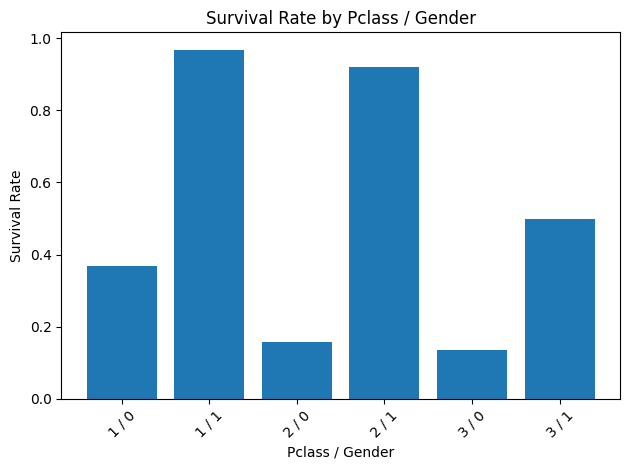

In [31]:
# Create a compact view
cols_for_story = ["Survived", "Gender", "Pclass", "IsAlone"]
missing_cols = [c for c in cols_for_story if c not in df.columns]
if missing_cols:
    print("Missing columns for storytelling:", missing_cols)

story_df = df[cols_for_story].copy()

# Survival by Gender × Pclass
gp1 = pd.pivot_table(story_df, values="Survived", index="Pclass", columns="Gender", aggfunc="mean")
print("Survival rate by Pclass × Gender:")
display(gp1)

# Survival by IsAlone × Gender
gp2 = pd.pivot_table(story_df, values="Survived", index="IsAlone", columns="Gender", aggfunc="mean")
print("Survival rate by IsAlone × Gender:")
display(gp2)

# Combined 3-feature groupby
gp3 = story_df.groupby(["Pclass", "Gender", "IsAlone"], as_index=False)["Survived"].mean().sort_values("Survived", ascending=False)
print("Top combinations by survival rate:")
display(gp3.head(10))

# Optional: Simple plot (matplotlib, no seaborn, single-plot, no custom colors)
import matplotlib.pyplot as plt

comb = story_df.groupby(["Pclass", "Gender"])["Survived"].mean().reset_index()
comb["Label"] = comb["Pclass"].astype(str) + " / " + comb["Gender"].astype(str)

plt.figure()
plt.bar(comb["Label"], comb["Survived"])
plt.title("Survival Rate by Pclass / Gender")
plt.xlabel("Pclass / Gender")
plt.ylabel("Survival Rate")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()